## Installation

In [1]:
!pip install tf-nightly -q

     |████████████████████████████████| 390.2MB 40kB/s 
     |████████████████████████████████| 460kB 49.4MB/s 
     |████████████████████████████████| 10.1MB 43.3MB/s 


In [2]:
import tensorflow as tf 
print(tf.__version__)

2.4.0-dev20200914


In [3]:
import os
import pathlib

# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 2168, done.
remote: Counting objects: 100% (2168/2168), done.
remote: Compressing objects: 100% (1873/1873), done.
remote: Total 2168 (delta 514), reused 929 (delta 271), pack-reused 0
Receiving objects: 100% (2168/2168), 30.39 MiB | 30.60 MiB/s, done.
Resolving deltas: 100% (514/514), done.


In [4]:
# Install the Object Detection API
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp36-none-any.whl size=1571721 sha256=3410a50465603d64aa97e7994ab2a584bd3c85cec0f2aa123252f1363ab16c44
  Stored in directory: /tmp/pip-ephem-wheel-cache-r_o0cx2y/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
  Created wheel for avro-python3: filename=avro_python3-1.10.0-cp36-none-any.whl size=43735 sha256=d9464cfb6284684632e8b669609b13a47f978d71f6df1b166227ca76c8a463a8
  Stored in directory: /root/.cache/pip/wheels/3f/15/cd/fe4ec8b88c130393464703ee8111e2cddebdc40e1b59ea85e9
  Created wheel for oauth2client: filename=oauth2client-3.0.0-cp36-none-any.whl size=106382 sha256=6f686ac6df57c6f60d9cc5b5794608a244593fed91007abd176763e50a3b9647
  Stored in directory: /root/.cache/pip/wheels/48/f7/87/b932f09c6335dbcf45d916937105a372ab14f353a9ca431d7d
  Created wheel for hdfs: filename=hdfs-2.5.8-cp36-none-any.whl size=33213 sha256=b77adf2a5045e83c7a6e3245236b95bf51c95ec110f

ERROR: pydrive 1.3.1 has requirement oauth2client>=4.0.0, but you'll have oauth2client 3.0.0 which is incompatible.
ERROR: multiprocess 0.70.10 has requirement dill>=0.3.2, but you'll have dill 0.3.1.1 which is incompatible.
ERROR: apache-beam 2.23.0 has requirement avro-python3!=1.9.2,<1.10.0,>=1.8.1; python_version >= "3.0", but you'll have avro-python3 1.10.0 which is incompatible.


In [5]:
#run model builder test
!python /content/models/research/object_detection/builders/model_builder_tf2_test.py

2020-09-14 14:38:53.960106: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2020-09-14 14:38:53.960156: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Running tests under Python 3.6.9: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model
2020-09-14 14:38:56.958289: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2020-09-14 14:38:56.986076: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-09-14 14:38:57.044208: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detec

## Downloading model

In [6]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz
!tar -xvf ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz

--2020-09-14 14:39:33--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.213.128, 2607:f8b0:400c:c15::80
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.213.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46042990 (44M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_32 100%[===================>]  43.91M   114MB/s    in 0.4s    

2020-09-14 14:39:34 (114 MB/s) - ‘ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz’ saved [46042990/46042990]

ssd_mobilenet_v2_320x320_coco17_tpu-8/
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_320x320_coco17_tpu-8

In [7]:
!ls -lah ssd_mobilenet_v2_320x320_coco17_tpu-8/

total 24K
drwxr-x--- 4 345018 89939 4.0K Jul 11 00:15 .
drwxr-xr-x 1 root   root  4.0K Sep 14 14:39 ..
drwxr-x--- 2 345018 89939 4.0K Jul 10 04:08 checkpoint
-rw-r----- 1 345018 89939 4.4K Jul 11 00:15 pipeline.config
drwxr-x--- 3 345018 89939 4.0K Jul 10 03:57 saved_model


In [8]:
!ls -lah ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model

total 8.8M
drwxr-x--- 3 345018 89939 4.0K Jul 10 03:57 .
drwxr-x--- 4 345018 89939 4.0K Jul 11 00:15 ..
-rw-r----- 1 345018 89939 8.8M Jul 10 03:57 saved_model.pb
drwxr-x--- 2 345018 89939 4.0K Jul 10 04:00 variables


## Export a TFLite compatible model graph 

In [9]:
!python /content/models/research/object_detection/export_tflite_graph_tf2.py \
    --trained_checkpoint_dir ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint \
    --output_directory `pwd` \
    --pipeline_config_path ssd_mobilenet_v2_320x320_coco17_tpu-8/pipeline.config

2020-09-14 14:39:35.348804: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2020-09-14 14:39:35.348853: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2020-09-14 14:39:37.957028: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2020-09-14 14:39:37.957963: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-09-14 14:39:37.961203: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-09-14 14:39:37.961240: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not

In [10]:
!ls -lah /content/saved_model/

total 6.4M
drwxr-xr-x 4 root root 4.0K Sep 14 14:40 .
drwxr-xr-x 1 root root 4.0K Sep 14 14:40 ..
drwxr-xr-x 2 root root 4.0K Sep 14 14:40 assets
-rw-r--r-- 1 root root 6.4M Sep 14 14:40 saved_model.pb
drwxr-xr-x 2 root root 4.0K Sep 14 14:40 variables


## Convert model to Tensorflow Lite

In [11]:
# Convert the model to TF lite
converter = tf.lite.TFLiteConverter.from_saved_model('/content/saved_model/')
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Serialize the model
open('model.tflite', 'wb').write(tflite_model)

6618592

In [12]:
!ls -lah model.tflite

-rw-r--r-- 1 root root 6.4M Sep 14 14:40 model.tflite


## Run inference of Tensorflow Lite model

In [13]:
!wget -O dog.jpg https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/test_images/image1.jpg

--2020-09-14 14:40:33--  https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/test_images/image1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129862 (127K) [image/jpeg]
Saving to: ‘dog.jpg’

dog.jpg             100%[===================>] 126.82K  --.-KB/s    in 0.04s   

2020-09-14 14:40:33 (3.39 MB/s) - ‘dog.jpg’ saved [129862/129862]



In [14]:
# based on https://github.com/tensorflow/examples/blob/master/lite/examples/object_detection/raspberry_pi/detect_picamera.py

from PIL import Image, ImageDraw, ImageFont
import re, glob
from six import BytesIO
import numpy as np


def draw_image(image, results, size):
    result_size = len(results)
    for idx, obj in enumerate(results):
        # Prepare image for drawing
        draw = ImageDraw.Draw(image)

        # Prepare boundary box
        xmin, ymin, xmax, ymax = obj['bounding_box']
        xmin = int(xmin * size[1])
        xmax = int(xmax * size[1])
        ymin = int(ymin * size[0])
        ymax = int(ymax * size[0])

        # Draw rectangle to desired thickness
        for x in range( 0, 4 ):
            draw.rectangle((ymin, xmin, ymax, xmax), outline=(255, 255, 0), width=5)

    displayImage = np.asarray( image )
    display(Image.fromarray(displayImage))

def load_labels(path):
    """Loads the labels file. Supports files with or without index numbers."""
    with open(path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        labels = {}
        for row_number, content in enumerate(lines):
            pair = re.split(r'[:\s]+', content.strip(), maxsplit=1)
            if len(pair) == 2 and pair[0].strip().isdigit():
                labels[int(pair[0])] = pair[1].strip()
            else:
                labels[row_number] = pair[0].strip()
    return labels

def set_input_tensor(interpreter, image):
    """Sets the input tensor."""
    tensor_index = interpreter.get_input_details()[0]['index']
    input_tensor = interpreter.tensor(tensor_index)()[0]
    input_tensor[:, :] = image


def get_output_tensor(interpreter, index):
    """Returns the output tensor at the given index."""
    output_details = interpreter.get_output_details()[index]
    tensor = np.squeeze(interpreter.get_tensor(output_details['index']))
    return tensor


def detect_objects(interpreter, image, threshold):
    """Returns a list of detection results, each a dictionary of object info."""
    set_input_tensor(interpreter, image)
    interpreter.invoke()

    # Get all output details
    boxes = get_output_tensor(interpreter, 0)
    classes = get_output_tensor(interpreter, 1)
    scores = get_output_tensor(interpreter, 2)
    count = int(get_output_tensor(interpreter, 3))

    results = []
    for i in range(count):
        if scores[i] >= threshold:
            result = {
                'bounding_box': boxes[i],
                'class_id': classes[i],
                'score': scores[i]
            }
            results.append(result)
    return results

In [15]:
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()
_, input_height, input_width, _ = interpreter.get_input_details()[0]['shape']

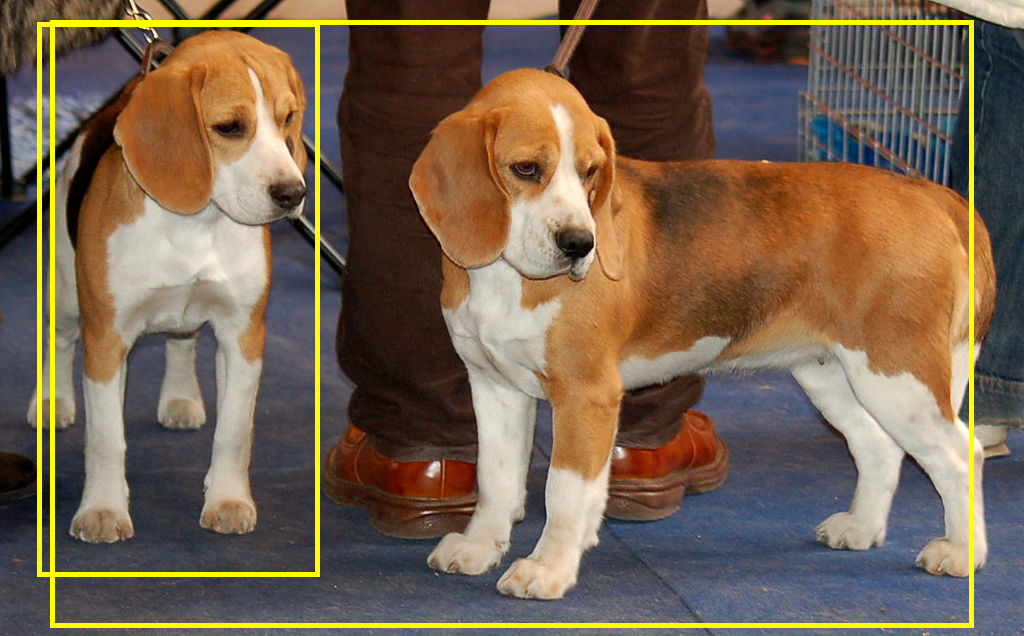

In [16]:
image = Image.open('dog.jpg')
image_pred = image.resize((input_width ,input_height), Image.ANTIALIAS)
results = detect_objects(interpreter, image_pred, 0.5)

draw_image(image, results, image.size)